In [9]:
import pandas as pd 
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv(r"C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\df_peleas_limpio.csv")
df


,Unnamed: 0.1,index,Unnamed: 0,Peleador_A,Peleador_B,DATE,CATEGORY,WINNER,TIME,ROUND,...,TITLE_FIGHT,WOMEN,METHOD_DQ,METHOD_Decision - Majority,METHOD_Decision - Split,METHOD_Decision - Unanimous,METHOD_KO/TKO,METHOD_Overturned,METHOD_Submission,METHOD_TKO - Doctor's Stoppage
0,0,2517,2517,Laverne Clark,Frank Caracci,1999-01-08,LIGHTWEIGHT,False,412,1,...,False,False,False,False,False,False,True,False,False,False
1,1,2516,2516,Evan Tanner,Darrel Gholar,1999-01-08,MIDDLEWEIGHT,False,477,1,...,False,False,False,False,False,False,False,False,True,False
2,2,2515,2515,Mikey Burnett,Townsend Saunders,1999-01-08,LIGHTWEIGHT,False,180,2,...,False,False,False,False,False,True,False,False,False,False
3,3,2514,2514,Tito Ortiz,Jerry Bohlander,1999-01-08,MIDDLEWEIGHT,False,151,2,...,False,False,False,False,False,False,False,False,False,True
4,4,2513,2513,Pedro Rizzo,Mark Coleman,1999-01-08,HEAVYWEIGHT,False,180,2,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15683,15683,2521,2521,Rodolfo Bellato,Jimmy Crute,2025-02-15,LIGHTHEAVYWEIGHT,True,300,3,...,False,False,False,True,False,False,False,False,False,False
15684,15684,2520,2520,Tallison Teixeira,Justin Tafa,2025-02-15,HEAVYWEIGHT,True,35,1,...,False,False,False,False,False,False,True,False,False,False
15685,15685,2519,2519,Tatiana Suarez,Zhang Weili,2025-02-15,STRAWWEIGHT,False,300,5,...,True,True,False,False,False,True,False,False,False,False
15686,15686,2518,2518,Sean Strickland,Dricus Du Plessis,2025-02-15,MIDDLEWEIGHT,False,300,5,...,True,False,False,False,False,True,False,False,False,False


In [47]:
df.columns

Index(['Unnamed: 0.1', 'index', 'Unnamed: 0', 'Peleador_A', 'Peleador_B',
       'DATE', 'CATEGORY', 'WINNER', 'TIME', 'ROUND', 'KD_A', 'KD_B',
       'SIG_STR_A', 'SIG_STR_B', 'TD_PORC_A', 'TD_PORC_B', 'SUB_ATT_A',
       'SUB_ATT_B', 'REV_A', 'REV_B', 'CTRL_A', 'CTRL_B', 'TOTAL_STR_A_x',
       'TOTAL_STR_A_y', 'TOTAL_STR_B_x', 'TOTAL_STR_B_y', 'TD_A_x', 'TD_A_y',
       'TD_B_x', 'TD_B_y', 'STR_HEAD_A_x', 'STR_HEAD_A_y', 'STR_HEAD_B_x',
       'STR_HEAD_B_y', 'STR_BODY_A_x', 'STR_BODY_A_y', 'STR_BODY_B_x',
       'STR_BODY_B_y', 'STR_LEG_A_x', 'STR_LEG_A_y', 'STR_LEG_B_x',
       'STR_LEG_B_y', 'STR_DISTANCE_A_x', 'STR_DISTANCE_A_y',
       'STR_DISTANCE_B_x', 'STR_DISTANCE_B_y', 'STR_CLINCH_A_x',
       'STR_CLINCH_A_y', 'STR_CLINCH_B_x', 'STR_CLINCH_B_y', 'STR_GROUND_A_x',
       'STR_GROUND_A_y', 'STR_GROUND_B_x', 'STR_GROUND_B_y', 'KD_DIFF',
       'SIG_STR_DIFF', 'TD_DIFF', 'SUB_ATT_DIFF', 'REV_DIFF', 'CTRL_DIFF',
       'STRIKER_A', 'STRIKER_B', 'GRAPPLER_A', 'GRAPPLER_B', 'TI

El objetivo de este análisis es evaluar la relación entre la cantidad de **golpes significativos** realizados por los peleadores y el **resultado de la pelea** (victoria o derrota). Se busca determinar si un mayor número de golpes significativos está asociado con una mayor probabilidad de ganar, comparando el rendimiento de los peleadores en victorias y derrotas. Además, se pretende identificar si existe un patrón entre los golpes dados y el resultado final, lo que podría ser útil para desarrollar estrategias en peleas futuras.

C:\Users\araca\AppData\Local\Temp\ipykernel_23216\738604795.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Peleador A (Ganador)', 'Peleador B (Ganador)', 'Peleador A (Perdedor)', 'Peleador B (Perdedor)'],


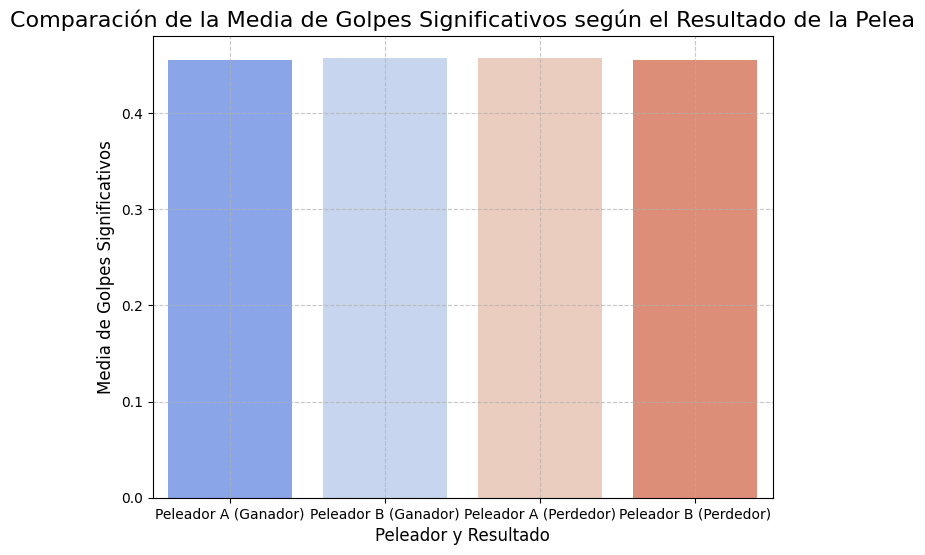

In [49]:
# Media de los Golpes Significativos según el Resultado de la Pelea
mean_sig_str_A_win = df[df['WINNER'] == False]['SIG_STR_A'].mean()
mean_sig_str_B_win = df[df['WINNER'] == True]['SIG_STR_B'].mean()
mean_sig_str_A_loss = df[df['WINNER'] == True]['SIG_STR_A'].mean()
mean_sig_str_B_loss = df[df['WINNER'] == False]['SIG_STR_B'].mean()

# Crear un gráfico de barras para comparar las medias
plt.figure(figsize=(8,6))
sns.barplot(x=['Peleador A (Ganador)', 'Peleador B (Ganador)', 'Peleador A (Perdedor)', 'Peleador B (Perdedor)'], 
            y=[mean_sig_str_A_win, mean_sig_str_B_win, mean_sig_str_A_loss, mean_sig_str_B_loss], 
            palette='coolwarm')
plt.title("Comparación de la Media de Golpes Significativos según el Resultado de la Pelea", fontsize=16)
plt.xlabel("Peleador y Resultado", fontsize=12)
plt.ylabel("Media de Golpes Significativos", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Este estudio es interesante porque nos permite observar cómo la diferencia de golpes significativos entre los dos peleadores se asocia con el resultado final de la pelea (victoria o derrota). Al comparar la distribución de la diferencia de golpes significativos en peleas ganadas y perdidas, podemos identificar si una diferencia mayor a favor de un peleador está relacionada con una mayor probabilidad de victoria. Esto puede ofrecer información valiosa sobre la estrategia de pelea y qué tan decisiva es la efectividad en los golpes significativos para determinar el vencedor. Además, entender estas distribuciones ayuda a resaltar patrones y posibles debilidades en los peleadores, como la capacidad de un perdedor para lanzar muchos golpes sin lograr una diferencia significativa, lo que podría sugerir una falta de precisión o eficiencia en su ataque.

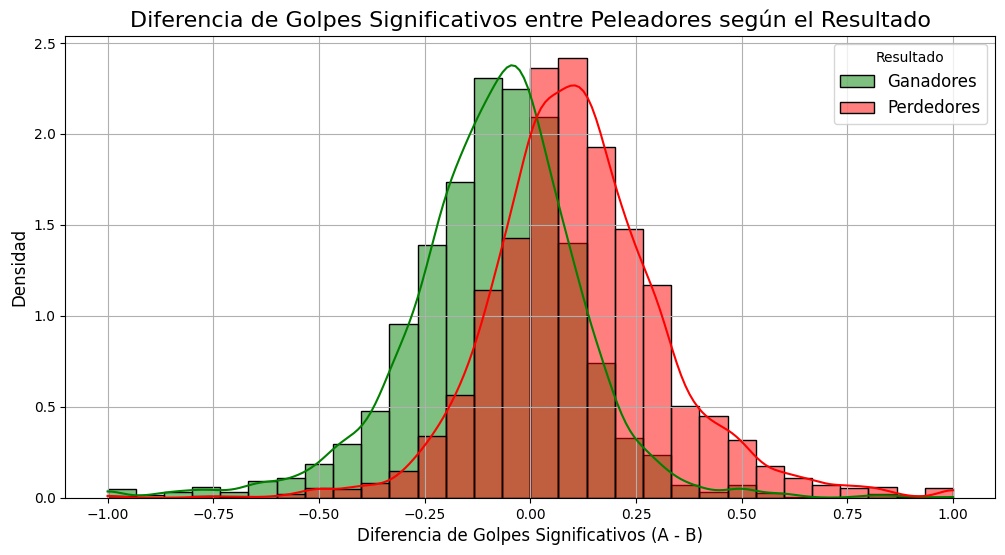

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['WINNER'] == True]['SIG_STR_DIFF'], kde=True, color='green', bins=30, stat="density", label='Ganadores')
sns.histplot(df[df['WINNER'] == False]['SIG_STR_DIFF'], kde=True, color='red', bins=30, stat="density", label='Perdedores')
plt.title("Diferencia de Golpes Significativos entre Peleadores según el Resultado", fontsize=16)
plt.xlabel("Diferencia de Golpes Significativos (A - B)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Resultado", fontsize=12)
plt.grid(True)
plt.show()


Al observar la distribución de la diferencia de golpes significativos entre los peleadores según el resultado de la pelea, se nota que los ganadores, en general, tienden a tener una diferencia positiva en los golpes significativos, lo que indica que, en promedio, lograron conectar más golpes que sus oponentes. Sin embargo, también se observa una amplia dispersión en los datos, lo que sugiere que la diferencia de golpes significativos varía considerablemente entre las peleas, con algunas en las que la disparidad es muy grande y otras en las que es mínima o incluso negativa.

Por otro lado, los perdedores muestran una tendencia a tener una diferencia negativa, lo que indica que, en promedio, conectaron menos golpes que sus oponentes. A pesar de esta tendencia, la distribución de los datos de los perdedores es más dispersa, con una gran cantidad de peleas donde la diferencia es pequeña o incluso nula, pero también con algunas peleas donde la diferencia es bastante amplia, mostrando una gran variabilidad en los resultados.

En conjunto, esto sugiere que aunque la diferencia en golpes significativos puede influir en el resultado de una pelea, no es el único factor determinante. La variabilidad en las diferencias de golpes, tanto entre ganadores como perdedores, señala que existen otros elementos, como la estrategia, el control del combate o la capacidad de derribar al oponente, que también juegan un papel clave en el resultado final.

Este análisis es interesante porque permite evaluar la relación entre el porcentaje de derribos de los peleadores y el resultado final de la pelea, lo que puede proporcionar información clave sobre cómo el control del combate en el suelo puede influir en la victoria o la derrota. Al comparar los porcentajes de derribos de los peleadores A y B para los ganadores y los perdedores, se puede observar si existe una diferencia significativa entre los que logran derribar a su oponente de manera más eficiente y los que no. Si los ganadores tienen consistentemente un mayor porcentaje de derribos, esto podría indicar que el control del combate en el suelo es un factor importante para determinar el resultado de la pelea. Además, ver la distribución de derribos en las peleas perdidas puede ayudar a identificar si los perdedores fallaron en capitalizar sus oportunidades de derribo o si, a pesar de haber derribado a su oponente, no lograron controlar otras áreas importantes del combate. En resumen, este análisis proporciona una visión más profunda de la dinámica de las peleas, especialmente en términos de la importancia de los derribos para el desempeño general de los peleadores.

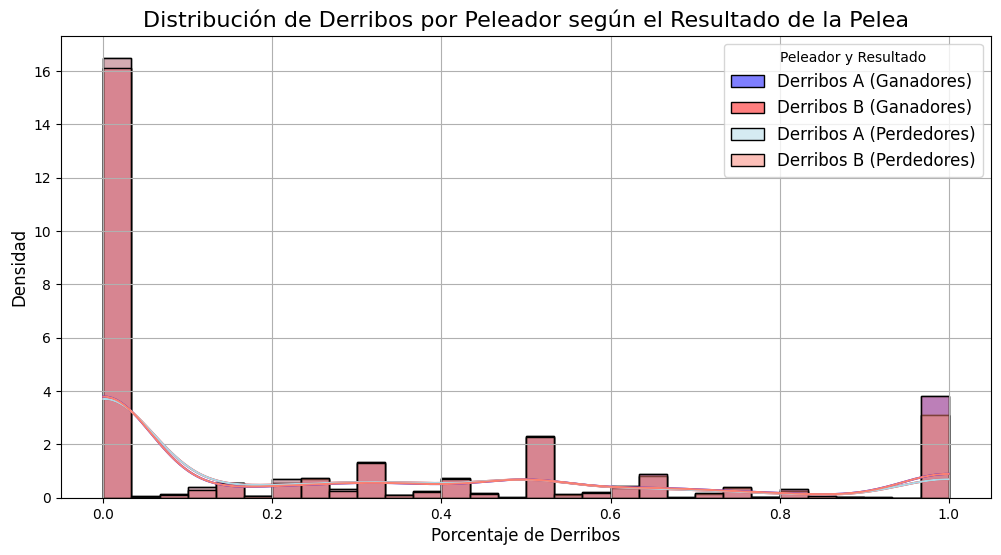

In [52]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['WINNER'] == False]['TD_PORC_A'], kde=True, color='blue', label='Derribos A (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['WINNER'] == True]['TD_PORC_B'], kde=True, color='red', label='Derribos B (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['WINNER'] == True]['TD_PORC_A'], kde=True, color='lightblue', label='Derribos A (Perdedores)', bins=30, stat="density")
sns.histplot(df[df['WINNER'] == False]['TD_PORC_B'], kde=True, color='salmon', label='Derribos B (Perdedores)', bins=30, stat="density")
plt.title("Distribución de Derribos por Peleador según el Resultado de la Pelea", fontsize=16)
plt.xlabel("Porcentaje de Derribos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador y Resultado", fontsize=12)
plt.grid(True)
plt.show()


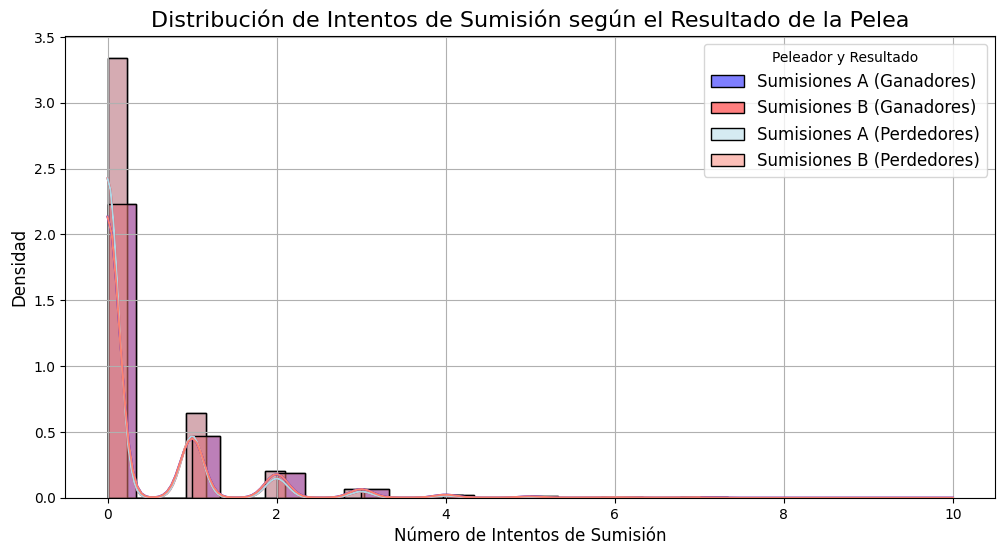

In [54]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['WINNER'] == False]['SUB_ATT_A'], kde=True, color='blue', label='Sumisiones A (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['WINNER'] == True]['SUB_ATT_B'], kde=True, color='red', label='Sumisiones B (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['WINNER'] == True]['SUB_ATT_A'], kde=True, color='lightblue', label='Sumisiones A (Perdedores)', bins=30, stat="density")
sns.histplot(df[df['WINNER'] == False]['SUB_ATT_B'], kde=True, color='salmon', label='Sumisiones B (Perdedores)', bins=30, stat="density")
plt.title("Distribución de Intentos de Sumisión según el Resultado de la Pelea", fontsize=16)
plt.xlabel("Número de Intentos de Sumisión", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador y Resultado", fontsize=12)
plt.grid(True)
plt.show()


La conclusión que se puede extraer del gráfico es que en las peleas donde no se realizan intentos de sumisión (0 intentos), los perdedores tienden a mostrar una mayor densidad, lo que sugiere que, aunque no lograron ganar, intentaron más sumisiones sin éxito. Por otro lado, los ganadores, con 0 intentos, presentan una densidad algo más baja, lo que puede indicar que no necesitaron recurrir a sumisiones para obtener la victoria. 

A medida que el número de intentos de sumisión aumenta, los ganadores muestran una mayor densidad, lo que implica que cuando logran realizar intentos de sumisión, es más probable que estos sean efectivos, posiblemente como una estrategia ganadora. En cambio, los perdedores muestran una disminución en su densidad conforme avanzan los intentos, lo que sugiere que, a pesar de realizar intentos, no fueron efectivos en su ejecución y no contribuyeron al resultado positivo de la pelea.

Finalmente, a partir de dos intentos de sumisión, ambos grupos tienden a converger a cero de densidad, lo que podría indicar que el número de intentos de sumisión elevados no necesariamente resulta en una victoria y que el éxito en este tipo de maniobras se concentra en valores más bajos de intentos.

Este análisis tiene como objetivo explorar cómo la cantidad de reversos realizados por los peleadores en una pelea varía según si fueron ganadores o perdedores. Al comparar las distribuciones de reversos de los peleadores A y B, tanto en victorias como en derrotas, se busca identificar patrones de comportamiento que puedan estar asociados con el éxito o fracaso en la pelea.

Al observar la densidad de los reversos, este análisis puede ayudar a entender si un mayor número de reversos está relacionado con un mayor desempeño o si, por el contrario, los perdedores tienden a intentar más reversos sin lograr éxito. También puede identificar si hay una estrategia más efectiva en cuanto a reversos entre los peleadores ganadores en comparación con los perdedores, y si ciertos rangos de reversos son más frecuentes en los casos de victoria.

En resumen, este gráfico busca aportar información sobre cómo los reversos, como parte de la estrategia en una pelea, pueden influir en el resultado final, ayudando a los analistas a comprender mejor las dinámicas entre los movimientos de los peleadores y el éxito en sus enfrentamientos.

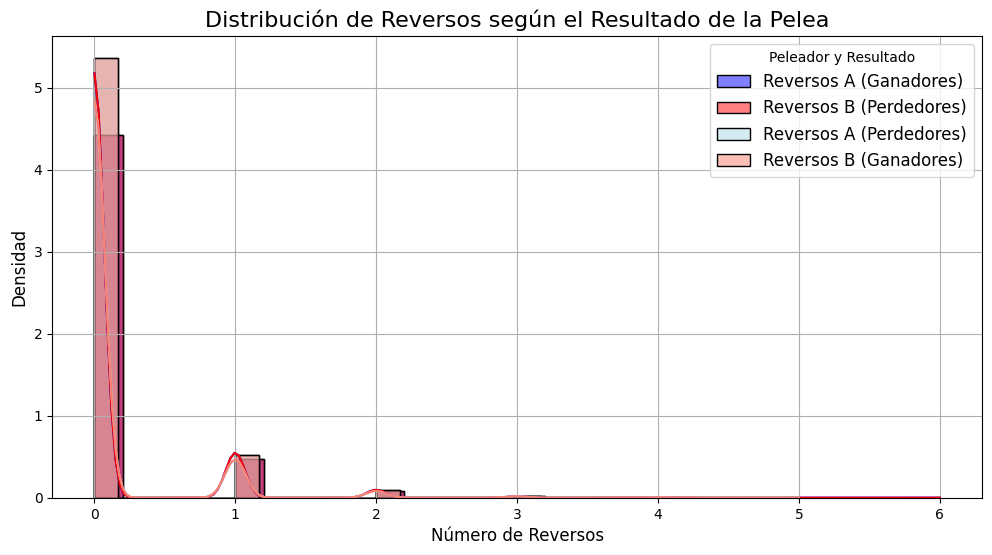

In [55]:
plt.figure(figsize=(12,6))

# Peleador A como ganador (WINNER == 0)
sns.histplot(df[df['WINNER'] == 0]['REV_A'], kde=True, color='blue', label='Reversos A (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['WINNER'] == 0]['REV_B'], kde=True, color='red', label='Reversos B (Perdedores)', bins=30, stat="density")

# Peleador B como ganador (WINNER == 1)
sns.histplot(df[df['WINNER'] == 1]['REV_A'], kde=True, color='lightblue', label='Reversos A (Perdedores)', bins=30, stat="density")
sns.histplot(df[df['WINNER'] == 1]['REV_B'], kde=True, color='salmon', label='Reversos B (Ganadores)', bins=30, stat="density")

plt.title("Distribución de Reversos según el Resultado de la Pelea", fontsize=16)
plt.xlabel("Número de Reversos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador y Resultado", fontsize=12)
plt.grid(True)
plt.show()


La conclusión que se puede extraer de la gráfica es que el atributo de los reversos no parece ser un factor determinante en el resultado de la pelea. La mayor parte de los valores se concentran en un rango bajo, entre 0 y 2 reversos, con una alta densidad cerca de 0. Esto indica que la mayoría de los peleadores no realizan muchos reversos durante sus combates, independientemente de si ganan o pierden. Además, conforme aumenta el número de reversos, la densidad disminuye rápidamente, lo que sugiere que los reversos no son una táctica frecuente en las peleas.

Otra observación relevante es que las distribuciones de densidad entre ganadores y perdedores son bastante similares a lo largo de todas las cantidades de reversos. Esto sugiere que el número de reversos no presenta una diferencia significativa entre los peleadores que ganan y los que pierden, lo que hace que este atributo no tenga un impacto claro en el resultado de la pelea. Por lo tanto, este análisis sugiere que los reversos no son un factor clave para predecir el éxito o fracaso en un combate.

Este análisis tiene como objetivo examinar cómo se distribuye el control de la pelea entre los peleadores y cómo este control podría influir en el resultado del combate. El "control" en una pelea puede referirse a la capacidad de un peleador para dominar la acción, dictar el ritmo del combate y asegurar que el oponente no tenga oportunidades claras de ataque o de realizar movimientos clave.

Al visualizar las distribuciones del porcentaje de control tanto para el peleador A como para el peleador B, se puede observar cómo varían los valores entre los ganadores y los perdedores. Si existe una diferencia significativa en el control entre los ganadores y perdedores, esto podría indicar que el control es un factor relevante en determinar el resultado de la pelea. Las distribuciones pueden mostrar que los ganadores tienen un control más consistente o más alto a lo largo de la pelea, mientras que los perdedores tienen picos más bajos o más variables.

Este tipo de análisis permite identificar patrones y conclusiones que podrían ser útiles para entrenadores, peleadores o analistas en la toma de decisiones estratégicas, entendiendo que un mayor control en la pelea podría correlacionarse con un mayor éxito en el combate.

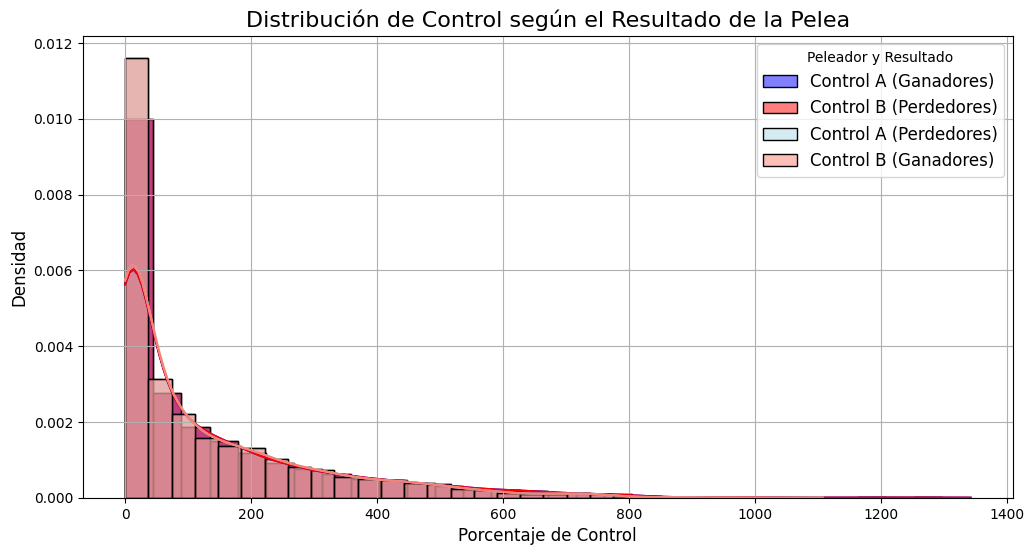

In [56]:
plt.figure(figsize=(12,6))

# Peleador A como ganador (WINNER == 0)
sns.histplot(df[df['WINNER'] == 0]['CTRL_A'], kde=True, color='blue', label='Control A (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['WINNER'] == 0]['CTRL_B'], kde=True, color='red', label='Control B (Perdedores)', bins=30, stat="density")

# Peleador B como ganador (WINNER == 1)
sns.histplot(df[df['WINNER'] == 1]['CTRL_A'], kde=True, color='lightblue', label='Control A (Perdedores)', bins=30, stat="density")
sns.histplot(df[df['WINNER'] == 1]['CTRL_B'], kde=True, color='salmon', label='Control B (Ganadores)', bins=30, stat="density")

plt.title("Distribución de Control según el Resultado de la Pelea", fontsize=16)
plt.xlabel("Porcentaje de Control", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador y Resultado", fontsize=12)
plt.grid(True)
plt.show()


El análisis de la distribución del porcentaje de control sugiere que este atributo podría estar relacionado con el éxito en la pelea. Se observa que cuando el control es nulo, los valores de densidad de los perdedores son ligeramente superiores a los de los ganadores, lo que indica que una proporción de peleadores que no ejercen control sobre la pelea tienden a perder.  

Sin embargo, a medida que el porcentaje de control aumenta, la densidad de los ganadores se incrementa notablemente, mientras que la de los perdedores cae drásticamente. Esto sugiere que el control es un factor clave en el éxito dentro del combate: los peleadores que logran imponer su dominio en la pelea tienen una mayor probabilidad de ganar.  

En términos estratégicos, este hallazgo resalta la importancia de mantener el control sobre el oponente, ya sea a través de la presión, la lucha en el suelo o el manejo del ritmo del combate, como un elemento determinante para aumentar las posibilidades de victoria.

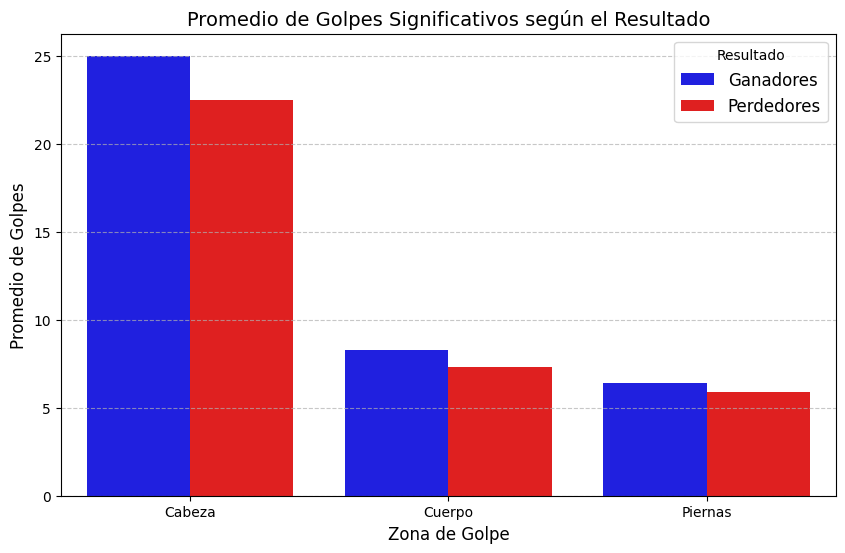

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el promedio de golpes efectivos en cada zona según el resultado de la pelea
golpes = {
    "Cabeza": ["STR_HEAD_A_x", "STR_HEAD_B_x"],
    "Cuerpo": ["STR_BODY_A_x", "STR_BODY_B_x"],
    "Piernas": ["STR_LEG_A_x", "STR_LEG_B_x"]
}

datos = []
for zona, columnas in golpes.items():
    golpes_ganadores = df[df["WINNER"] == 1][columnas].mean().mean()
    golpes_perdedores = df[df["WINNER"] == 0][columnas].mean().mean()
    datos.append([zona, "Ganadores", golpes_ganadores])
    datos.append([zona, "Perdedores", golpes_perdedores])

df_plot = pd.DataFrame(datos, columns=["Zona de Golpe", "Resultado", "Promedio de Golpes"])

# Crear gráfico de barras agrupadas
plt.figure(figsize=(10,6))
sns.barplot(data=df_plot, x="Zona de Golpe", y="Promedio de Golpes", hue="Resultado", 
            palette={"Ganadores": "blue", "Perdedores": "red"})

# Ajustes visuales
plt.title("Promedio de Golpes Significativos según el Resultado", fontsize=14)
plt.xlabel("Zona de Golpe", fontsize=12)
plt.ylabel("Promedio de Golpes", fontsize=12)
plt.legend(title="Resultado", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.show()


In [59]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['WINNER'] == 1]['Puntos_A'], kde=True, color='blue', label='Puntos A (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['WINNER'] == 1]['Puntos_B'], kde=True, color='red', label='Puntos B (Ganadores)', bins=30, stat="density")
sns.histplot(df[df['WINNER'] == 0]['Puntos_A'], kde=True, color='lightblue', label='Puntos A (Perdedores)', bins=30, stat="density")
sns.histplot(df[df['WINNER'] == 0]['Puntos_B'], kde=True, color='salmon', label='Puntos B (Perdedores)', bins=30, stat="density")
plt.title("Distribución de Puntos según el Resultado de la Pelea", fontsize=16)
plt.xlabel("Puntos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador y Resultado", fontsize=12)
plt.grid(True)
plt.show()


KeyError: 'Puntos_A'

<Figure size 1200x600 with 0 Axes>

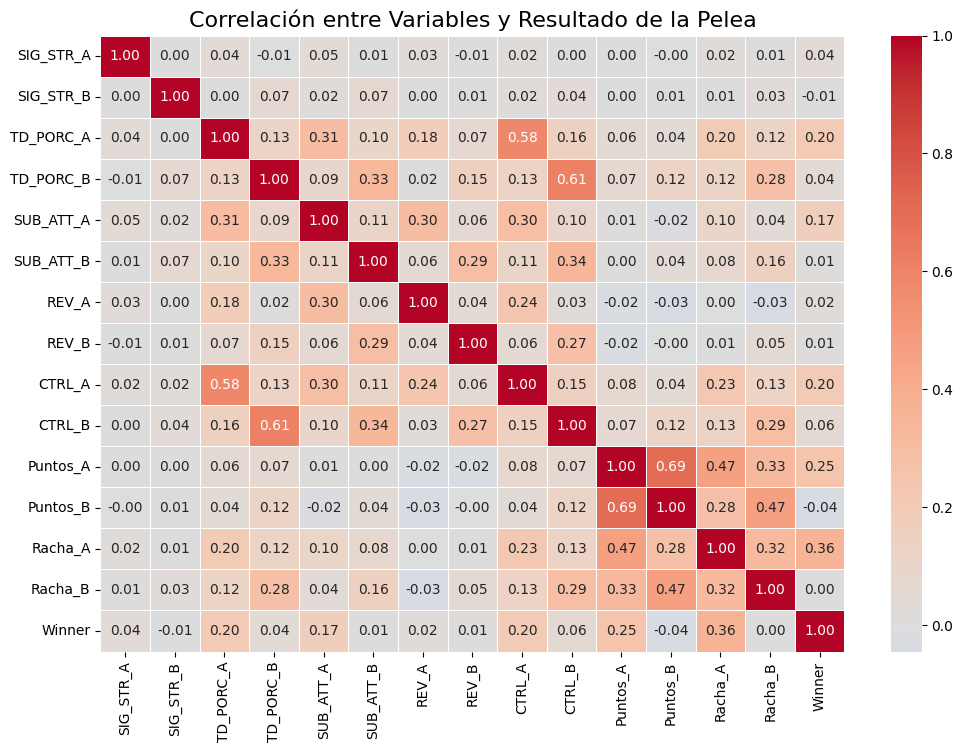

In [ ]:
# Crear una columna 'WINNER' que indique si A o B ganó
df['WINNER'] = (df['Puntos_A'] > df['Puntos_B']).astype(int)  # 1 = Peleador A ganó, 0 = Peleador B ganó

# Seleccionar las variables numéricas relevantes para el análisis
variables_relevantes = ['SIG_STR_A', 'SIG_STR_B', 'TD_PORC_A', 'TD_PORC_B', 'SUB_ATT_A', 'SUB_ATT_B', 
                        'REV_A', 'REV_B', 'CTRL_A', 'CTRL_B', 'Puntos_A', 'Puntos_B', 'Racha_A', 'Racha_B']

# Calcular la correlación entre las variables y el resultado
correlation_matrix = df[variables_relevantes + ['WINNER']].corr()

# Mostrar la correlación
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)
plt.title("Correlación entre Variables y Resultado de la Pelea", fontsize=16)
plt.show()


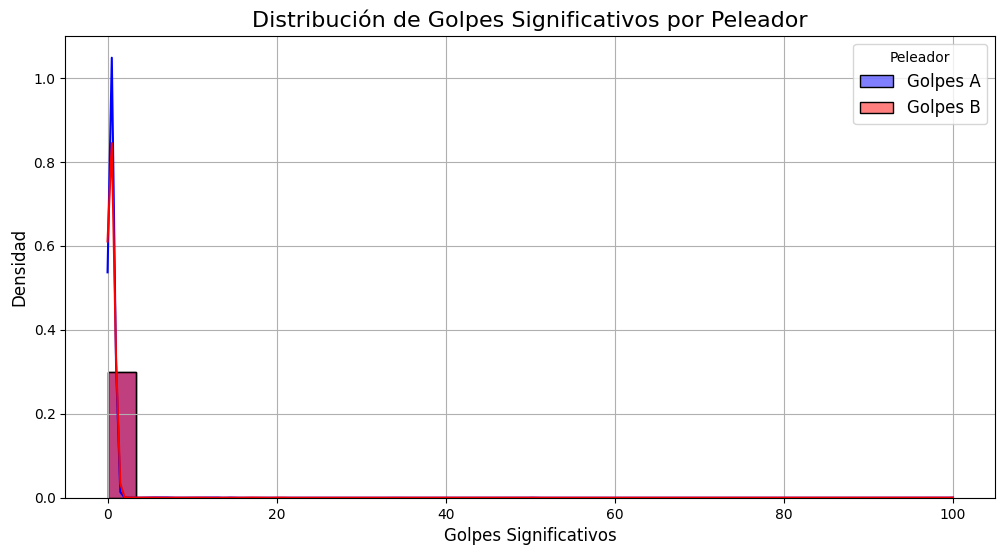

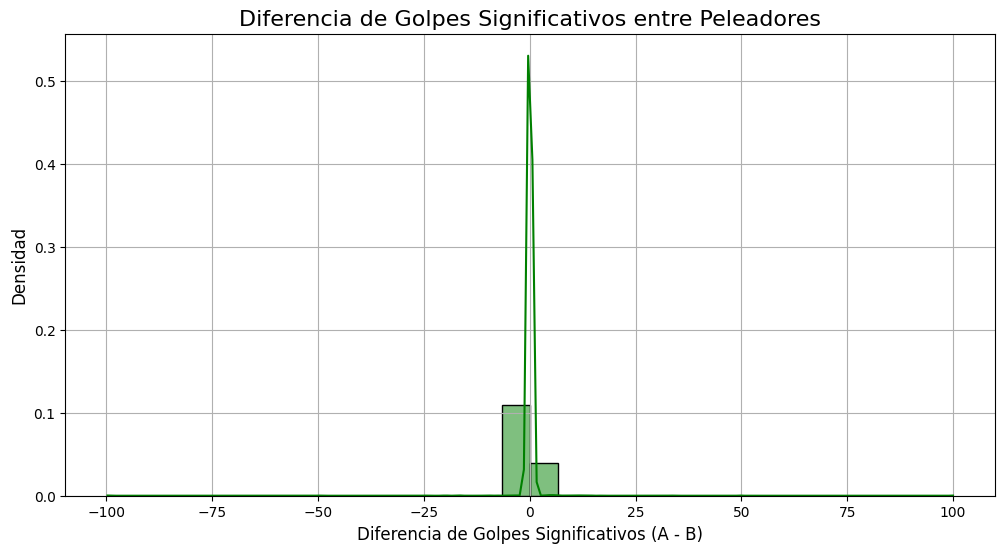

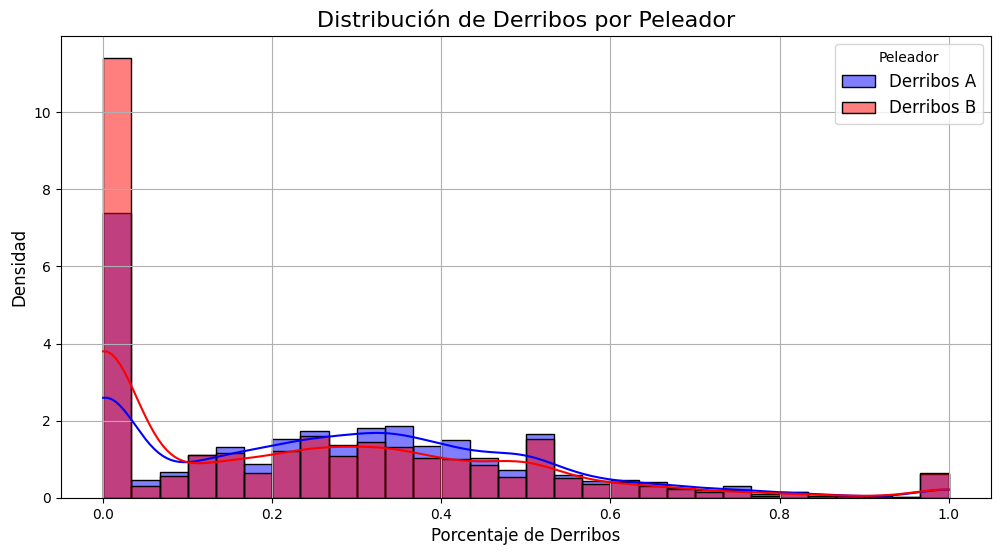

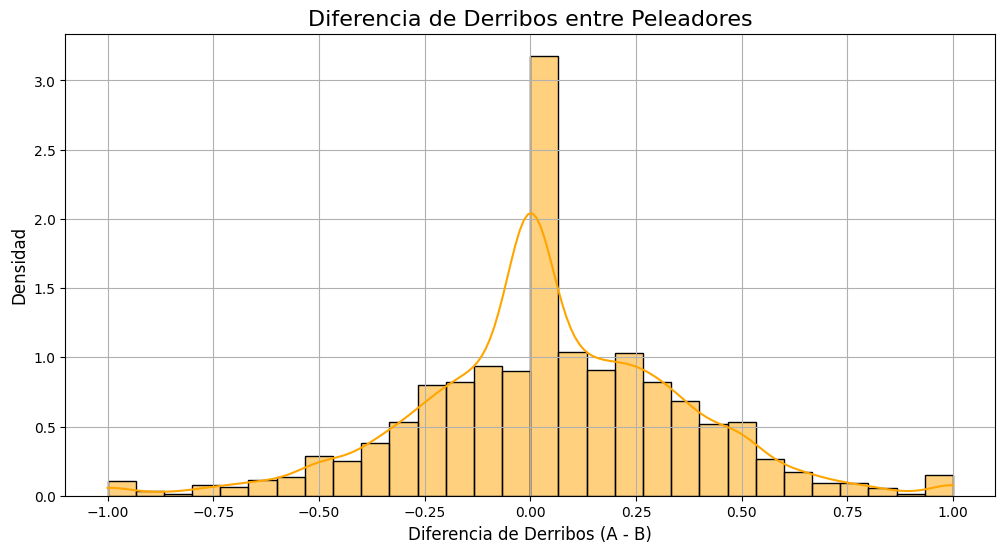

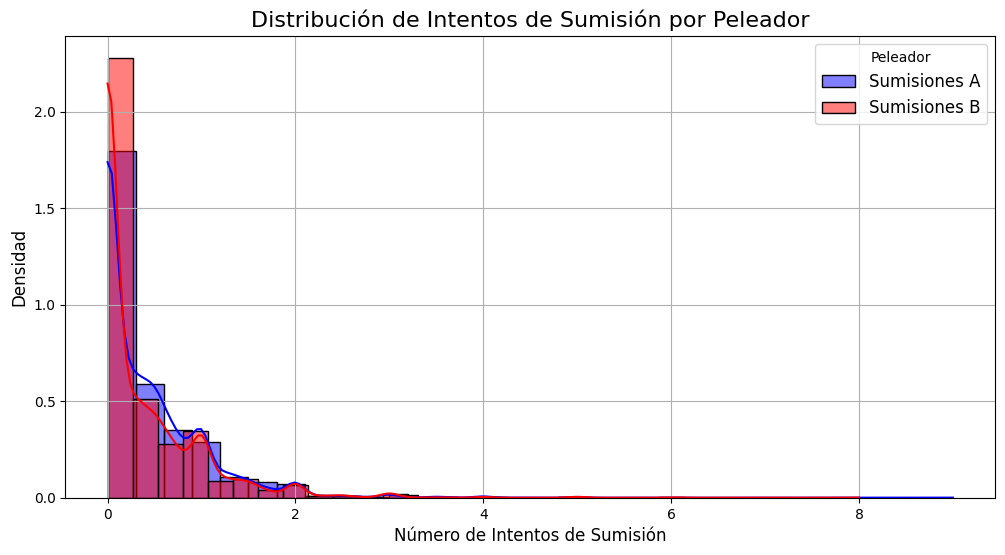

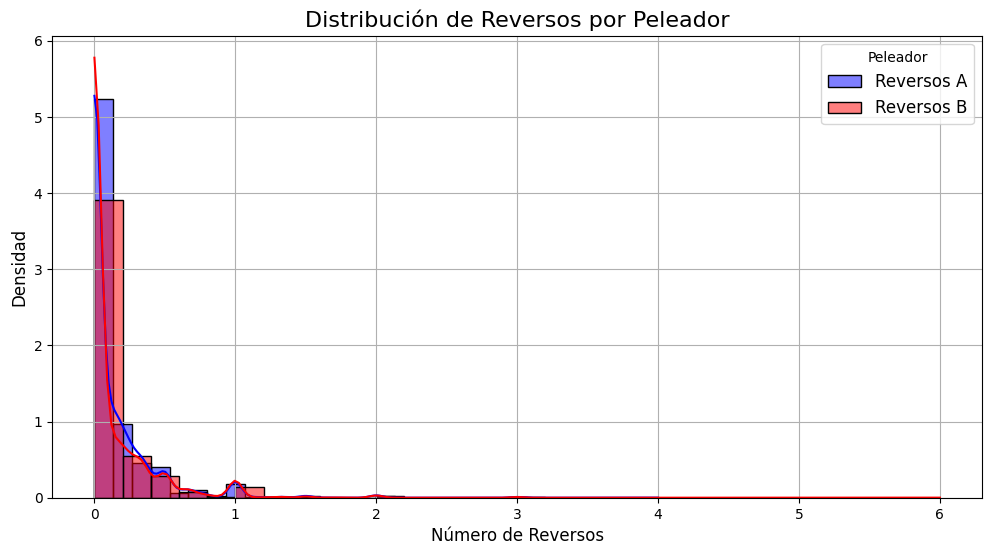

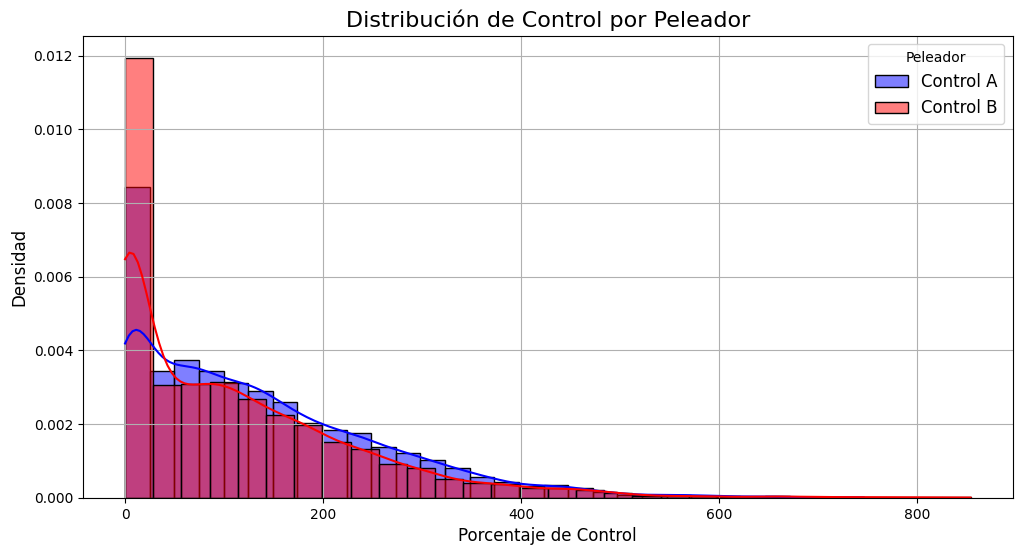

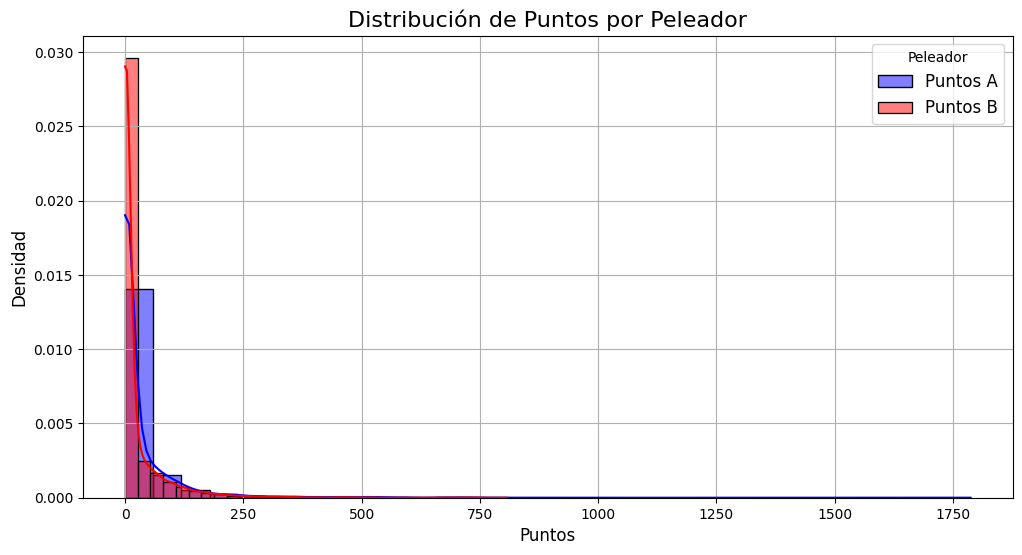

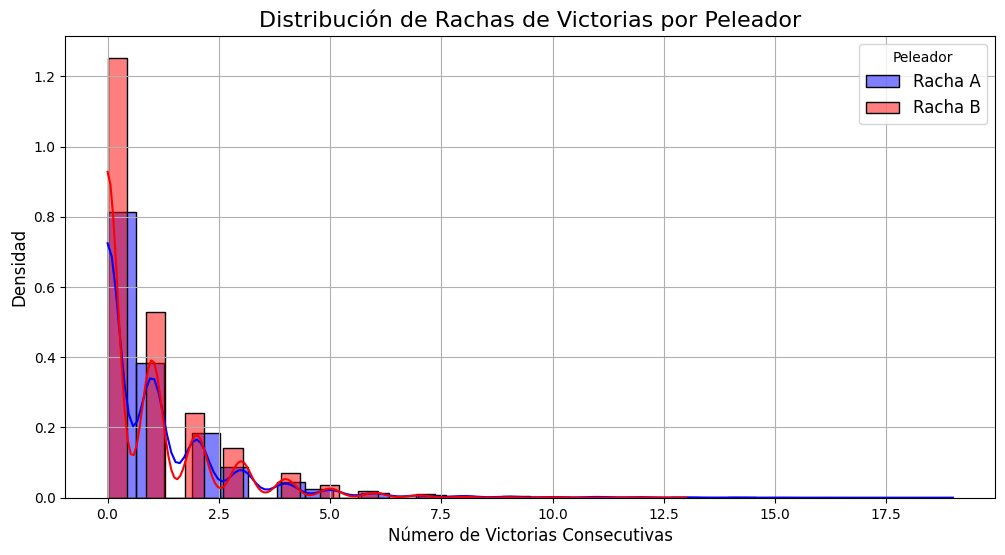

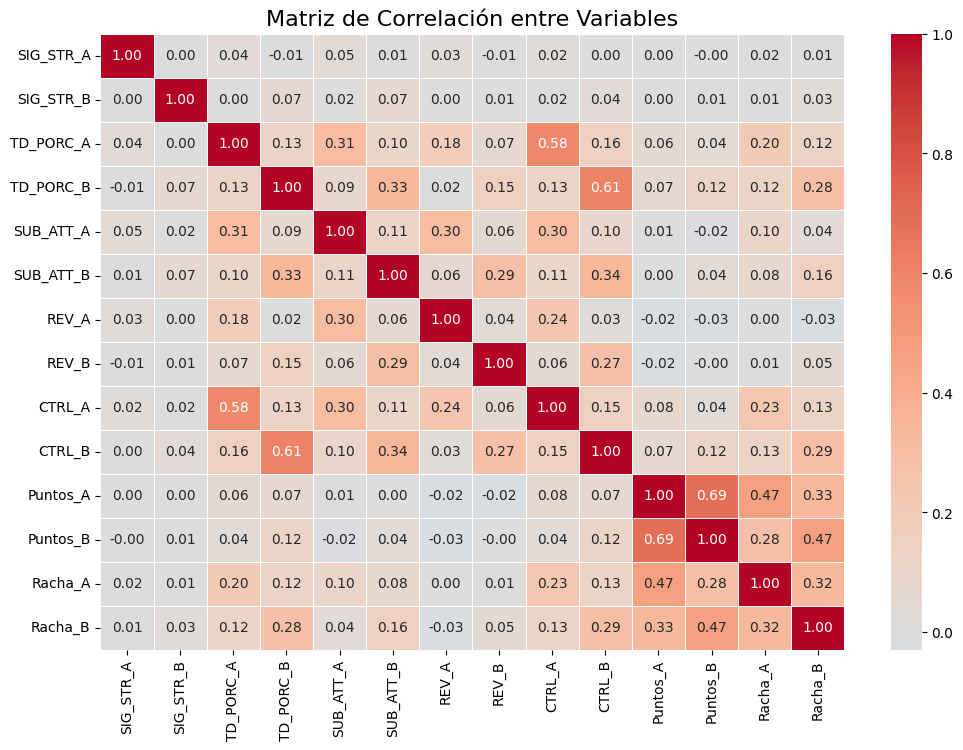

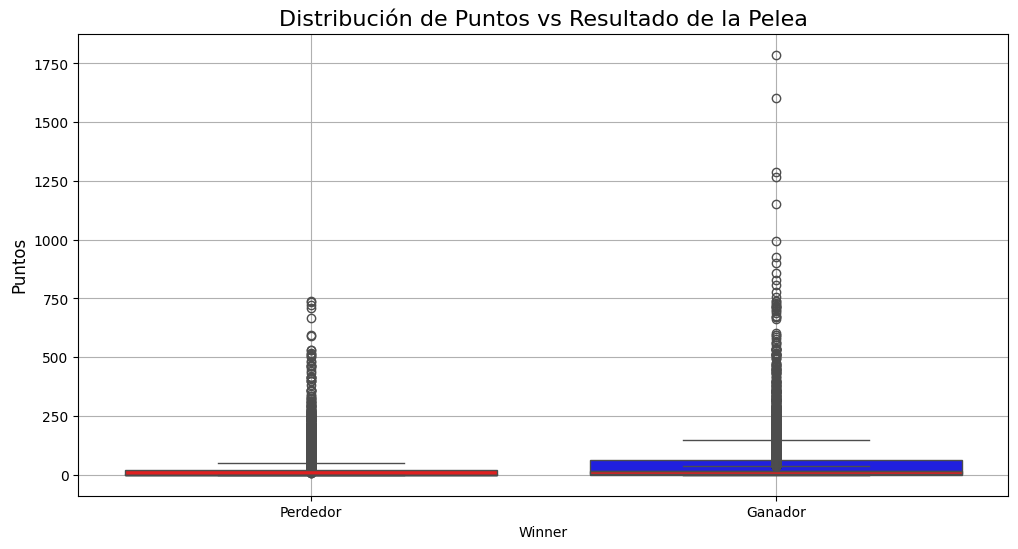

ValueError: Could not interpret value `METHOD` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que 'df' es el DataFrame con los datos proporcionados

# 1. Distribución de Golpes Significativos por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['SIG_STR_A'], kde=True, color='blue', label='Golpes A', bins=30, stat="density")
sns.histplot(df['SIG_STR_B'], kde=True, color='red', label='Golpes B', bins=30, stat="density")
plt.title("Distribución de Golpes Significativos por Peleador", fontsize=16)
plt.xlabel("Golpes Significativos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 2. Diferencia de Golpes Significativos entre los Peleadores
df['SIG_STR_DIFF'] = df['SIG_STR_A'] - df['SIG_STR_B']
plt.figure(figsize=(12,6))
sns.histplot(df['SIG_STR_DIFF'], kde=True, color='green', bins=30, stat="density")
plt.title("Diferencia de Golpes Significativos entre Peleadores", fontsize=16)
plt.xlabel("Diferencia de Golpes Significativos (A - B)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.grid(True)
plt.show()

# 3. Distribución de Derribos por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['TD_PORC_A'], kde=True, color='blue', label='Derribos A', bins=30, stat="density")
sns.histplot(df['TD_PORC_B'], kde=True, color='red', label='Derribos B', bins=30, stat="density")
plt.title("Distribución de Derribos por Peleador", fontsize=16)
plt.xlabel("Porcentaje de Derribos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 4. Diferencia de Derribos entre los Peleadores
df['TD_DIFF'] = df['TD_PORC_A'] - df['TD_PORC_B']
plt.figure(figsize=(12,6))
sns.histplot(df['TD_DIFF'], kde=True, color='orange', bins=30, stat="density")
plt.title("Diferencia de Derribos entre Peleadores", fontsize=16)
plt.xlabel("Diferencia de Derribos (A - B)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.grid(True)
plt.show()

# 5. Comparación de Intentos de Sumisión
plt.figure(figsize=(12,6))
sns.histplot(df['SUB_ATT_A'], kde=True, color='blue', label='Sumisiones A', bins=30, stat="density")
sns.histplot(df['SUB_ATT_B'], kde=True, color='red', label='Sumisiones B', bins=30, stat="density")
plt.title("Distribución de Intentos de Sumisión por Peleador", fontsize=16)
plt.xlabel("Número de Intentos de Sumisión", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 6. Comparación de Reversos por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['REV_A'], kde=True, color='blue', label='Reversos A', bins=30, stat="density")
sns.histplot(df['REV_B'], kde=True, color='red', label='Reversos B', bins=30, stat="density")
plt.title("Distribución de Reversos por Peleador", fontsize=16)
plt.xlabel("Número de Reversos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 7. Comparación de Control (CTRL) por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['CTRL_A'], kde=True, color='blue', label='Control A', bins=30, stat="density")
sns.histplot(df['CTRL_B'], kde=True, color='red', label='Control B', bins=30, stat="density")
plt.title("Distribución de Control por Peleador", fontsize=16)
plt.xlabel("Porcentaje de Control", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 8. Comparación de Puntos por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['Puntos_A'], kde=True, color='blue', label='Puntos A', bins=30, stat="density")
sns.histplot(df['Puntos_B'], kde=True, color='red', label='Puntos B', bins=30, stat="density")
plt.title("Distribución de Puntos por Peleador", fontsize=16)
plt.xlabel("Puntos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 9. Comparación de Rachas de Victorias por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['Racha_A'], kde=True, color='blue', label='Racha A', bins=30, stat="density")
sns.histplot(df['Racha_B'], kde=True, color='red', label='Racha B', bins=30, stat="density")
plt.title("Distribución de Rachas de Victorias por Peleador", fontsize=16)
plt.xlabel("Número de Victorias Consecutivas", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 10. Matriz de Correlación entre Variables Clave
correlation_matrix = df[['SIG_STR_A', 'SIG_STR_B', 'TD_PORC_A', 'TD_PORC_B', 'SUB_ATT_A', 'SUB_ATT_B', 
                          'REV_A', 'REV_B', 'CTRL_A', 'CTRL_B', 'Puntos_A', 'Puntos_B', 'Racha_A', 'Racha_B']].corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)
plt.title("Matriz de Correlación entre Variables", fontsize=16)
plt.show()

# 11. Comparación de Puntos vs Resultado de Pelea
df['WINNER'] = df['Puntos_A'] > df['Puntos_B']
plt.figure(figsize=(12,6))
sns.boxplot(x='WINNER', y='Puntos_A', data=df, color='blue')
sns.boxplot(x='WINNER', y='Puntos_B', data=df, color='red')
plt.title("Distribución de Puntos vs Resultado de la Pelea", fontsize=16)
plt.xticks([0, 1], ['Perdedor', 'Ganador'])
plt.ylabel("Puntos", fontsize=12)
plt.grid(True)
plt.show()

# 12. Distribución de Métodos de Victoria
plt.figure(figsize=(12,6))
sns.countplot(x='METHOD', data=df, palette='viridis')
plt.title("Distribución de Métodos de Victoria", fontsize=16)
plt.xlabel("Método de Victoria", fontsize=12)
plt.ylabel("Número de Peleas", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 13. Tendencia de Peleas por Año
df['Fecha'] = pd.to_datetime(df['Fecha'])  # Convertir fechas
df['Year'] = df['Fecha'].dt.year
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df, palette='magma')
plt.title("Número de Peleas por Año", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Número de Peleas", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


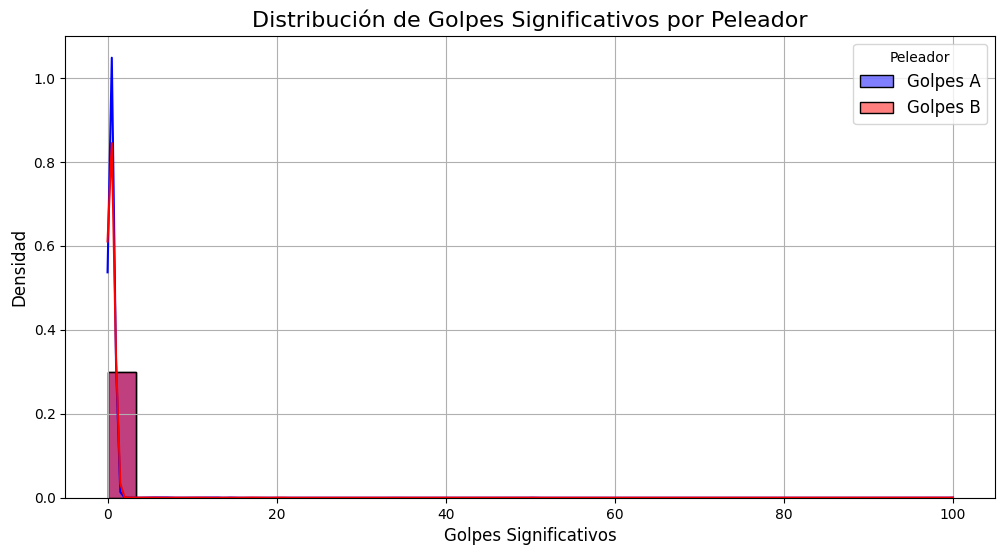

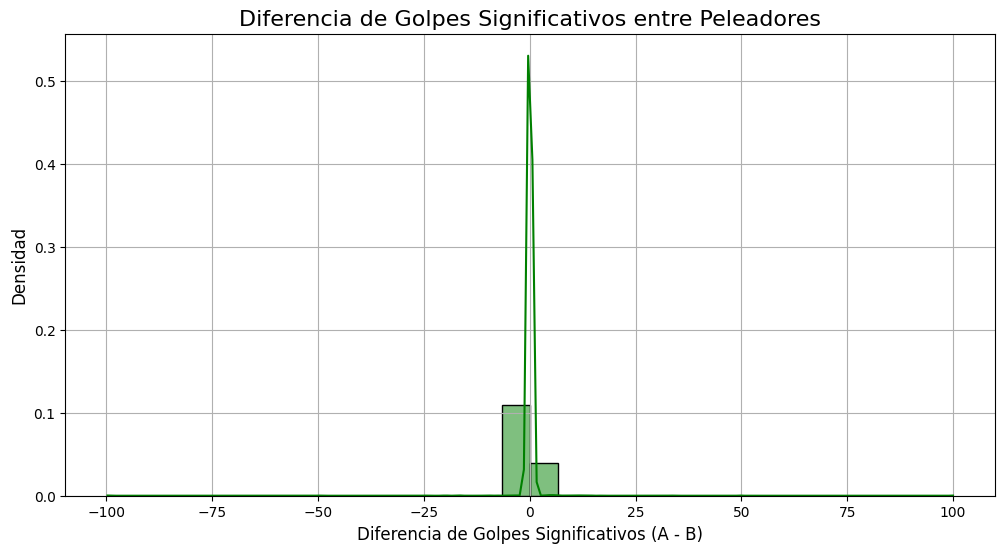

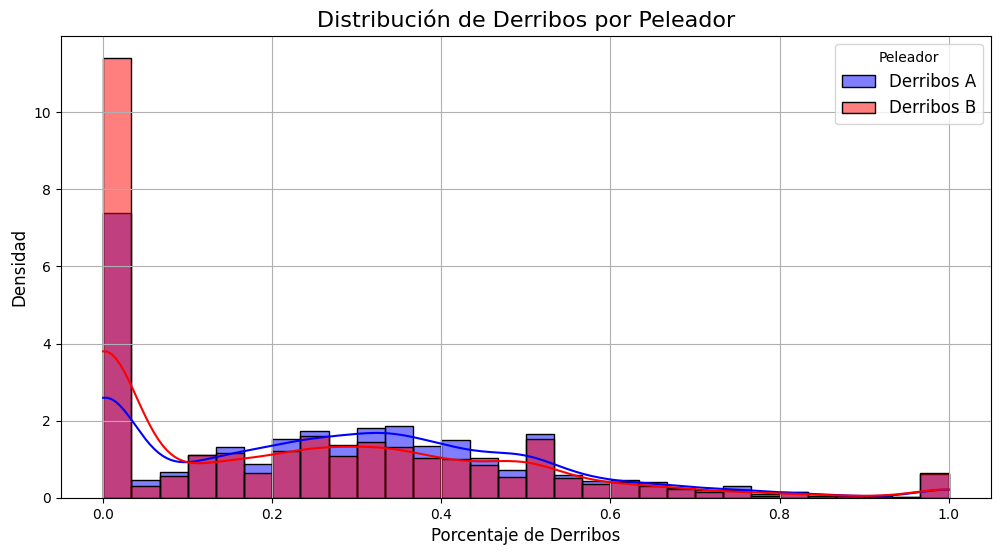

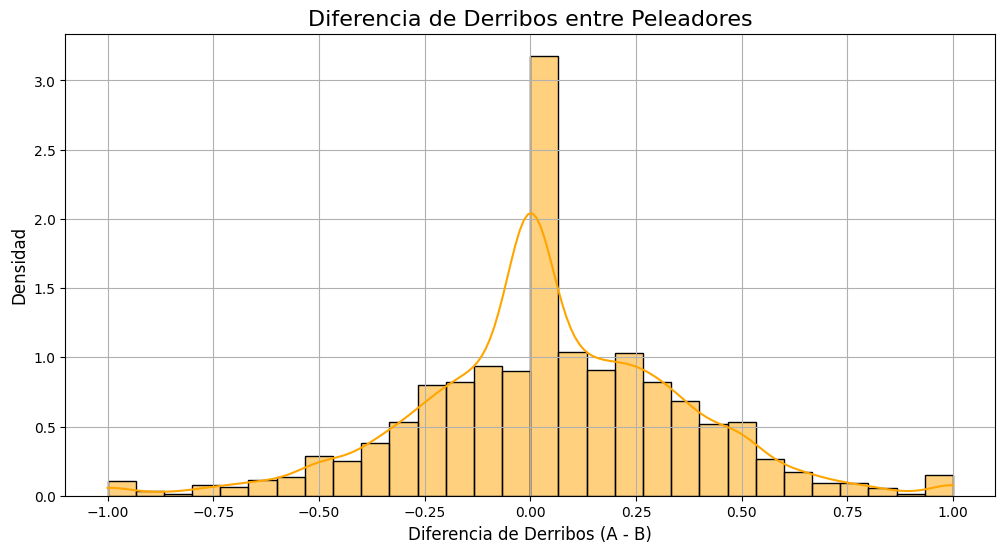

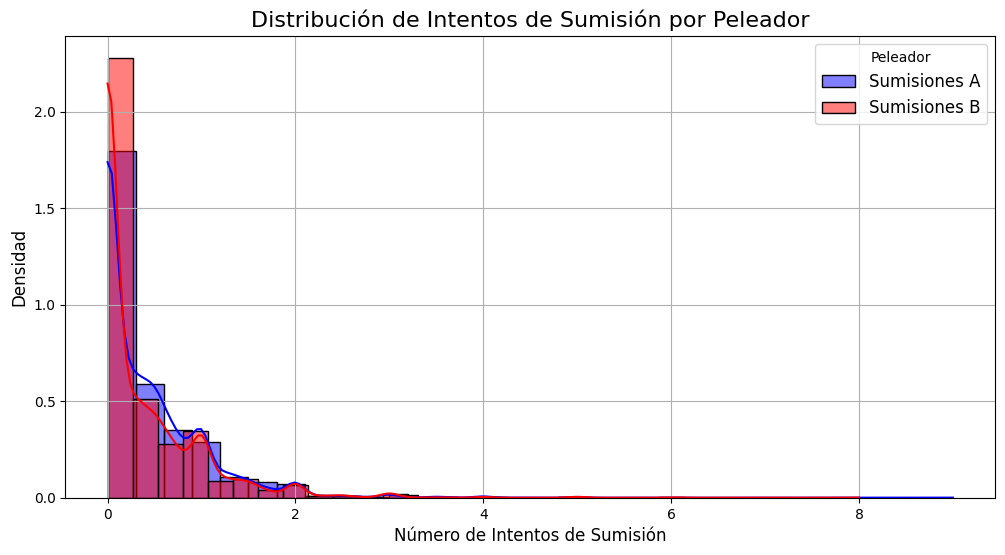

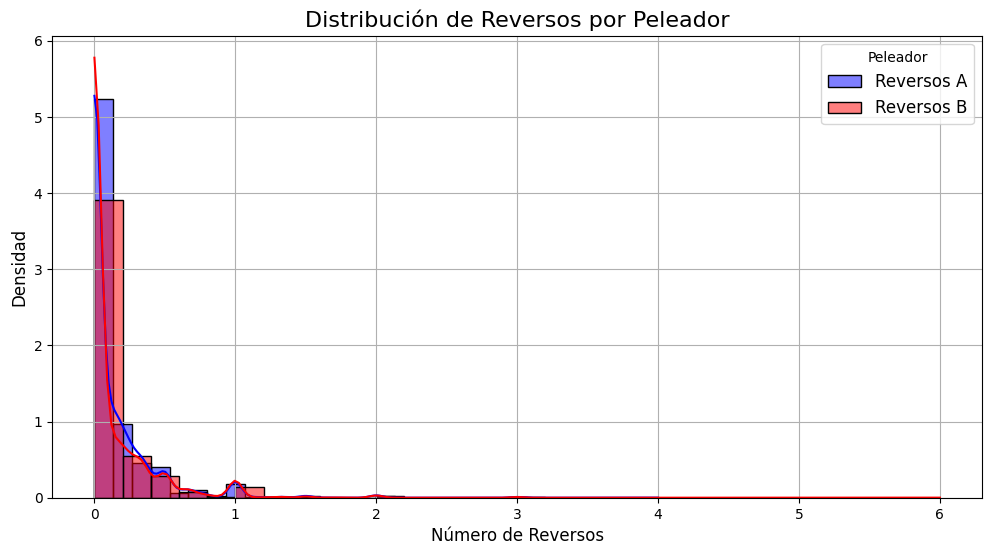

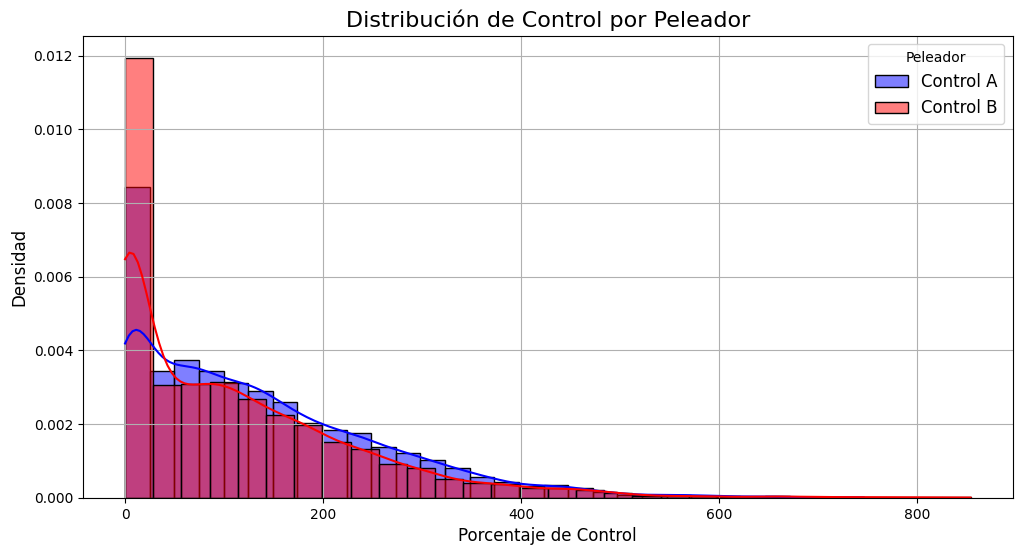

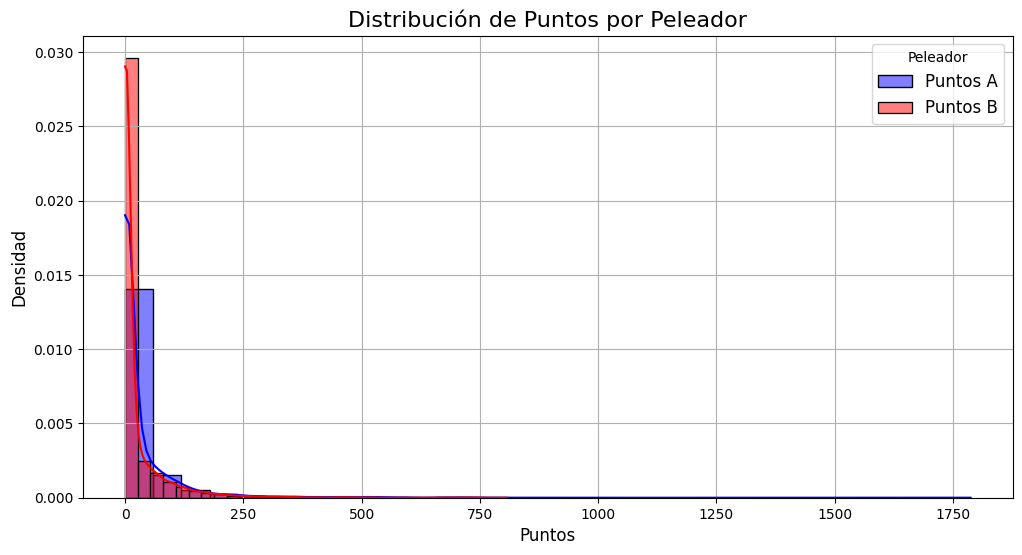

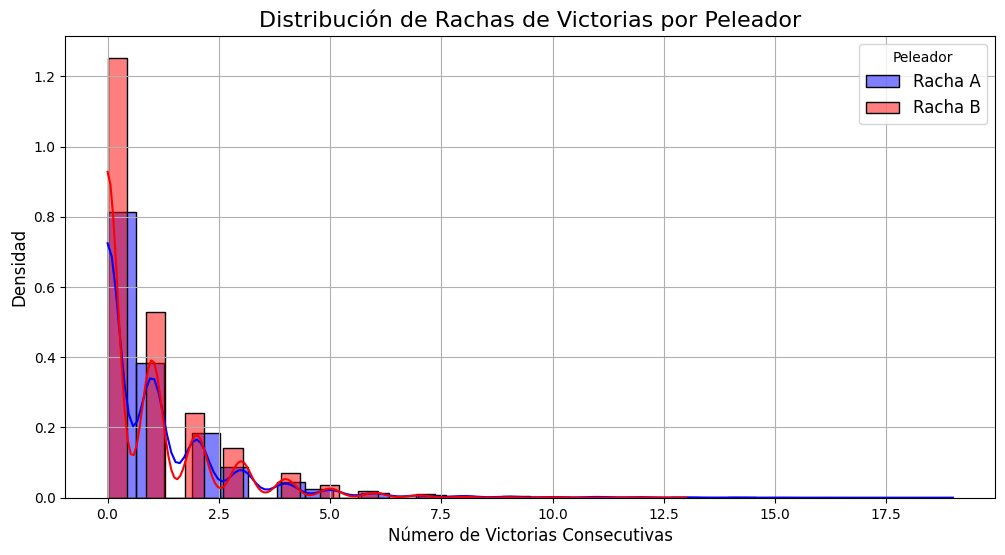

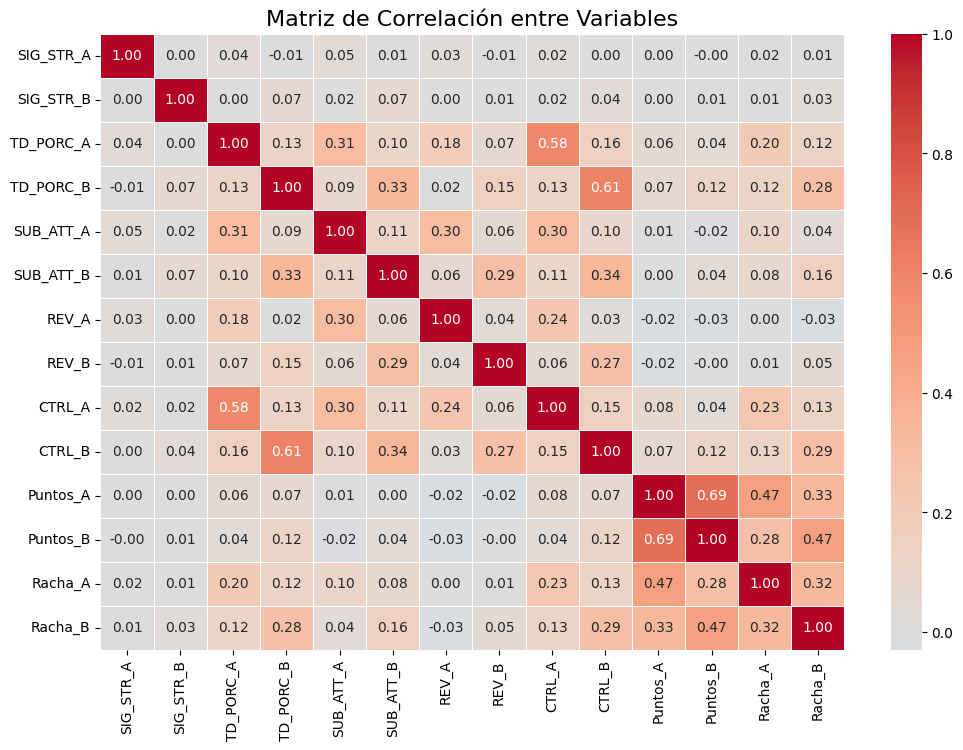

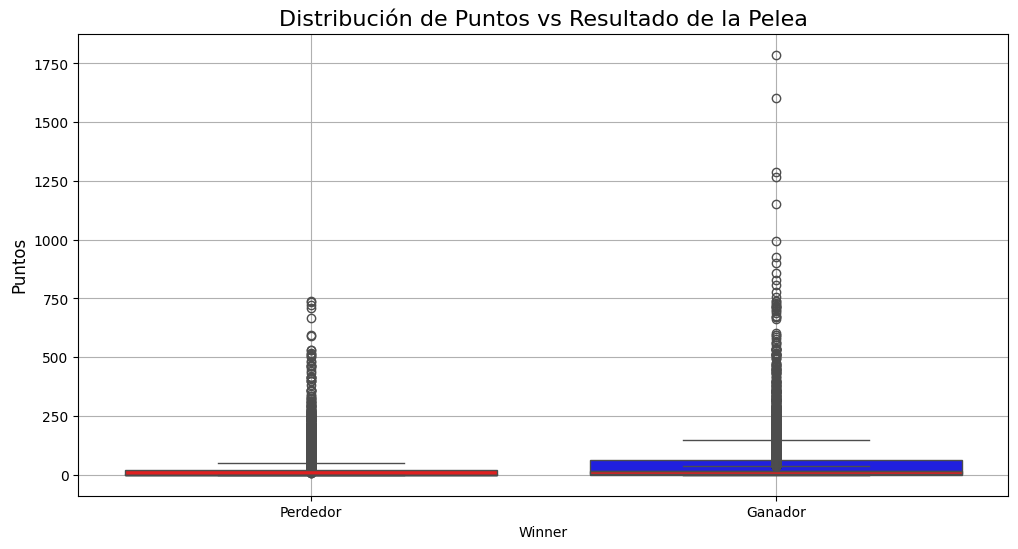

ValueError: Could not interpret value `METHOD` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Calcular la media de los golpes significativos por peleador
mean_sig_str_A = df['SIG_STR_A'].mean()
mean_sig_str_B = df['SIG_STR_B'].mean()

# Crear un gráfico de barras para comparar las medias
plt.figure(figsize=(8,6))
sns.barplot(x=['Peleador A', 'Peleador B'], y=[mean_sig_str_A, mean_sig_str_B], palette='coolwarm')
plt.title("Comparación de la Media de Golpes Significativos entre Peleadores", fontsize=16)
plt.xlabel("Peleador", fontsize=12)
plt.ylabel("Media de Golpes Significativos", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# 2. Diferencia de Golpes Significativos entre los Peleadores
df['SIG_STR_DIFF'] = df['SIG_STR_A'] - df['SIG_STR_B']
plt.figure(figsize=(12,6))
sns.histplot(df['SIG_STR_DIFF'], kde=True, color='green', bins=30, stat="density")
plt.title("Diferencia de Golpes Significativos entre Peleadores", fontsize=16)
plt.xlabel("Diferencia de Golpes Significativos (A - B)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.grid(True)
plt.show()

# 3. Distribución de Derribos por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['TD_PORC_A'], kde=True, color='blue', label='Derribos A', bins=30, stat="density")
sns.histplot(df['TD_PORC_B'], kde=True, color='red', label='Derribos B', bins=30, stat="density")
plt.title("Distribución de Derribos por Peleador", fontsize=16)
plt.xlabel("Porcentaje de Derribos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 4. Diferencia de Derribos entre los Peleadores
df['TD_DIFF'] = df['TD_PORC_A'] - df['TD_PORC_B']
plt.figure(figsize=(12,6))
sns.histplot(df['TD_DIFF'], kde=True, color='orange', bins=30, stat="density")
plt.title("Diferencia de Derribos entre Peleadores", fontsize=16)
plt.xlabel("Diferencia de Derribos (A - B)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.grid(True)
plt.show()

# 5. Comparación de Intentos de Sumisión
plt.figure(figsize=(12,6))
sns.histplot(df['SUB_ATT_A'], kde=True, color='blue', label='Sumisiones A', bins=30, stat="density")
sns.histplot(df['SUB_ATT_B'], kde=True, color='red', label='Sumisiones B', bins=30, stat="density")
plt.title("Distribución de Intentos de Sumisión por Peleador", fontsize=16)
plt.xlabel("Número de Intentos de Sumisión", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 6. Comparación de Reversos por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['REV_A'], kde=True, color='blue', label='Reversos A', bins=30, stat="density")
sns.histplot(df['REV_B'], kde=True, color='red', label='Reversos B', bins=30, stat="density")
plt.title("Distribución de Reversos por Peleador", fontsize=16)
plt.xlabel("Número de Reversos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 7. Comparación de Control (CTRL) por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['CTRL_A'], kde=True, color='blue', label='Control A', bins=30, stat="density")
sns.histplot(df['CTRL_B'], kde=True, color='red', label='Control B', bins=30, stat="density")
plt.title("Distribución de Control por Peleador", fontsize=16)
plt.xlabel("Porcentaje de Control", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 8. Comparación de Puntos por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['Puntos_A'], kde=True, color='blue', label='Puntos A', bins=30, stat="density")
sns.histplot(df['Puntos_B'], kde=True, color='red', label='Puntos B', bins=30, stat="density")
plt.title("Distribución de Puntos por Peleador", fontsize=16)
plt.xlabel("Puntos", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 9. Comparación de Rachas de Victorias por Peleador
plt.figure(figsize=(12,6))
sns.histplot(df['Racha_A'], kde=True, color='blue', label='Racha A', bins=30, stat="density")
sns.histplot(df['Racha_B'], kde=True, color='red', label='Racha B', bins=30, stat="density")
plt.title("Distribución de Rachas de Victorias por Peleador", fontsize=16)
plt.xlabel("Número de Victorias Consecutivas", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(title="Peleador", fontsize=12)
plt.grid(True)
plt.show()

# 10. Matriz de Correlación entre Variables Clave
correlation_matrix = df[['SIG_STR_A', 'SIG_STR_B', 'TD_PORC_A', 'TD_PORC_B', 'SUB_ATT_A', 'SUB_ATT_B', 
                          'REV_A', 'REV_B', 'CTRL_A', 'CTRL_B', 'Puntos_A', 'Puntos_B', 'Racha_A', 'Racha_B']].corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)
plt.title("Matriz de Correlación entre Variables", fontsize=16)
plt.show()

# 11. Comparación de Puntos vs Resultado de Pelea
df['WINNER'] = df['Puntos_A'] > df['Puntos_B']
plt.figure(figsize=(12,6))
sns.boxplot(x='WINNER', y='Puntos_A', data=df, color='blue')
sns.boxplot(x='WINNER', y='Puntos_B', data=df, color='red')
plt.title("Distribución de Puntos vs Resultado de la Pelea", fontsize=16)
plt.xticks([0, 1], ['Perdedor', 'Ganador'])
plt.ylabel("Puntos", fontsize=12)
plt.grid(True)
plt.show()

# 12. Distribución de Métodos de Victoria
plt.figure(figsize=(12,6))
sns.countplot(x='METHOD', data=df, palette='viridis')
plt.title("Distribución de Métodos de Victoria", fontsize=16)
plt.xlabel("Método de Victoria", fontsize=12)
plt.ylabel("Número de Peleas", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 13. Tendencia de Peleas por Año
df['Fecha'] = pd.to_datetime(df['Fecha'])  # Convertir fechas
df['Year'] = df['Fecha'].dt.year
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df, palette='magma')
plt.title("Número de Peleas por Año", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Número de Peleas", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
